# Data Processing

In [1]:
! python spotify_data_processing.py

Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1/train.csv
Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1/test.csv


In [2]:
import sys
from pathlib import Path
from train import train_model, hyper_parameter_tuning
from neural_network_trainer import NeuralNetworkTrainer
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# ML Training

In [15]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "svm_spotify.yaml"
train_model(config_path)

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\test.csv...
Initializing the svm model...
Training the model...
Evaluating the model...
SVM Model Accuracy: 0.6073298429319371
              precision    recall  f1-score   support

           0       0.59      0.31      0.41        83
           1       0.61      0.83      0.71       108

    accuracy                           0.61       191
   macro avg       0.60      0.57      0.56       191
weighted avg       0.60      0.61      0.58       191

Evaluation results saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\results\spotify_svm_results.json
SVM model saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\model_checkpoints\svm_model.pkl


# ML Debug

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\test.csv...
Initializing the svm model...


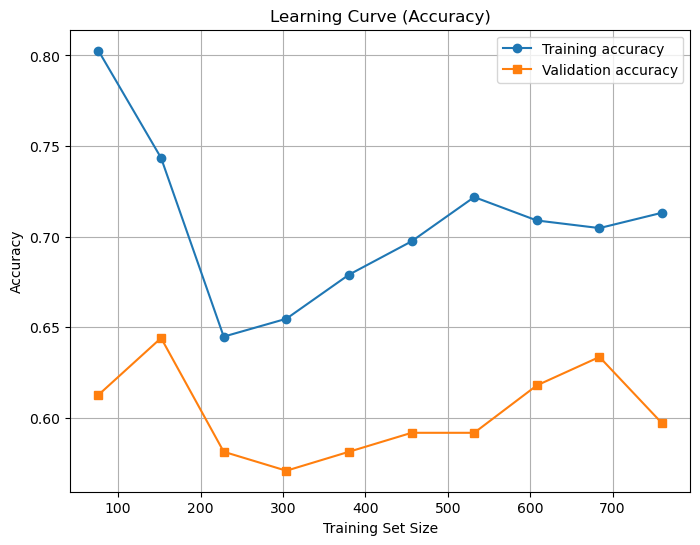

In [16]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "svm_spotify.yaml"
train_model(config_path, debug=True)

# Validation Curve

In [6]:
param_grids = {
        # "knn": {
        #     "n_neighbors": [3, 5, 7, 9]
        # },
        # "svm": {
        #     "kernel": ["rbf"],
        #     "C": [0.1, 1, 10],
        #     "gamma": ["scale", "auto", 0.2, 0.8]
        # },
        "xgboost": {
            # "n_estimators": [50, 100, 200],
            # "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [1, 2, 3, 6, 9, 12, 15]
        }
    }

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\spotify_v1\test.csv...
Initializing the xgboost model for hyperparameter tuning...
Performing hyperparameter tuning...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best hyperparameters: {'max_depth': 9}
Best cross-validation accuracy: 0.6364829396325459
Retraining the model with the best hyperparameters...
Evaluating the best model on the test set...
XGBOOST Model Accuracy: 0.5916230366492147
              precision    recall  f1-score   support

           0       0.53      0.52      0.52        83
           1       0.64      0.65      0.64       108

    accuracy                           0.59       191
   macro avg       0.58      0.58      0.58       191
weighted avg       0.59      0.59      0.59       191

Evaluation results saved to 

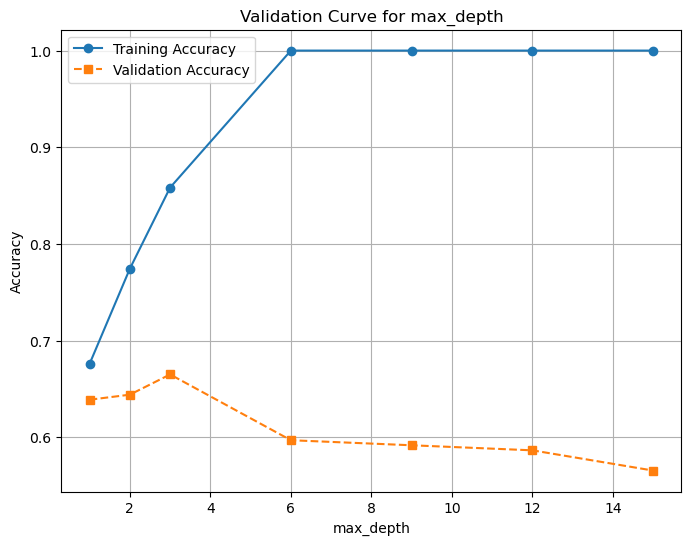

(GradientBoostingModel(max_depth=9), {'max_depth': 9}, 0.6364829396325459)

In [8]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "xgboost_spotify.yaml"
hyper_parameter_tuning(config_path, param_grids, "grid", validation_curve=True, param_name="max_depth")

# Neural Network Training

In [9]:
trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn_spotify.yaml", device="cuda")
trainer.train_and_evaluate()

Loading training data...
Loading test data...
Initializing model...
Training model...
Epoch 1/10, Loss: 0.7173
Epoch 2/10, Loss: 0.6962
Epoch 3/10, Loss: 0.6829
Epoch 4/10, Loss: 0.6742
Epoch 5/10, Loss: 0.6672
Epoch 6/10, Loss: 0.6616
Epoch 7/10, Loss: 0.6558
Epoch 8/10, Loss: 0.6513
Epoch 9/10, Loss: 0.6460
Epoch 10/10, Loss: 0.6419
Evaluating model...
{'0': {'f1-score': 0.29357798165137616,
       'precision': 0.6153846153846154,
       'recall': 0.1927710843373494,
       'support': 83.0},
 '1': {'f1-score': 0.717948717948718,
       'precision': 0.593939393939394,
       'recall': 0.9074074074074074,
       'support': 108.0},
 'accuracy': 0.5968586387434555,
 'macro avg': {'f1-score': 0.5057633498000471,
               'precision': 0.6046620046620047,
               'recall': 0.5500892458723784,
               'support': 191.0},
 'weighted avg': {'f1-score': 0.5335363037462082,
                  'precision': 0.603258521583129,
                  'recall': 0.5968586387434555,
      

# Neural Network Debug

Loading training data...
Loading test data...
Initializing model...


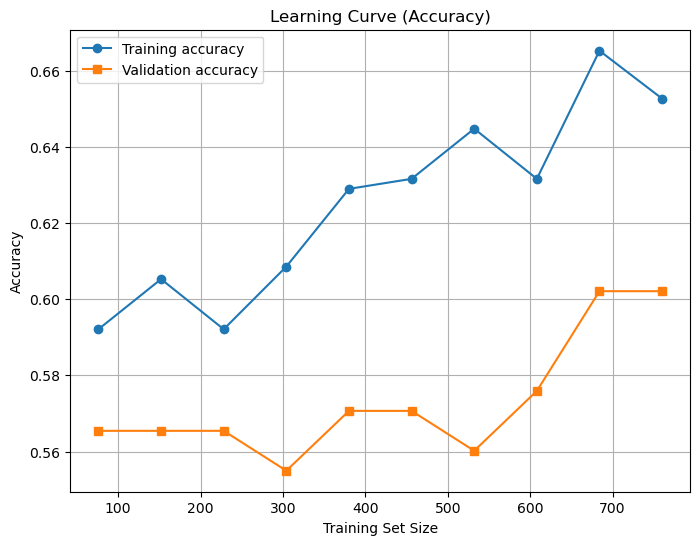

Loss curve


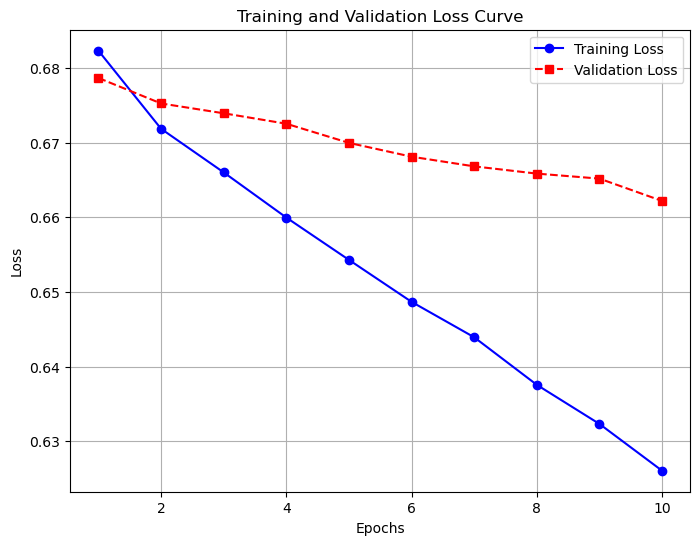

In [10]:
trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn_spotify.yaml", device="cuda")
trainer.train_and_evaluate(debug=True)

# Validation Curve

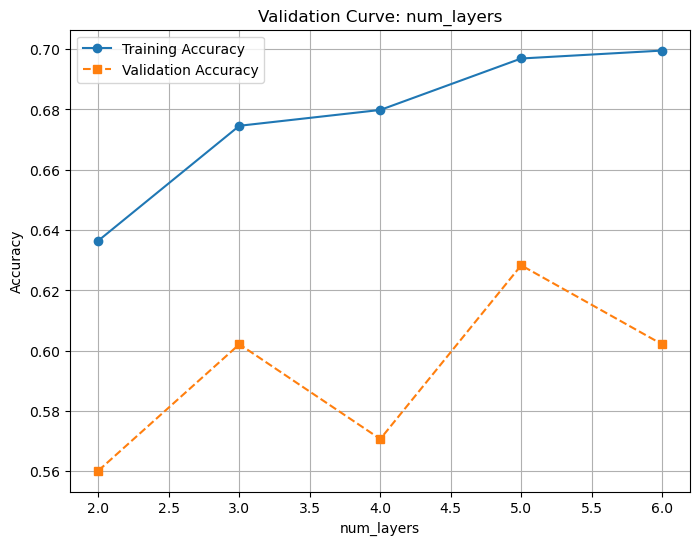

In [11]:
param_values = [2, 3, 4, 5, 6]

trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn_spotify.yaml", device="cuda")
trainer.plot_validation_curve("num_layers", param_values)